Udhay Dogra
<br>
Date: Apr. 4, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 33: Using built-in scipy functions</font></center>

## <font color=#46769B>Introduction</font>


We have gained experience with implementing DFT, as well as algorithms for calculating the periodogram and spectrogram. Our DFT algorithm was a brute-force approach:
- For each $k$, we calculate $c_k$ by adding together $N$ complex terms.
- We repeat the calculation over the $N$ values of $k$ to compute all Fourier coefficients.

It is clear that our algorithm scales as $\mathcal{O}(N^2)$. This means that if we double the number of samples, our algorithm will take four times as long to run. 

On the other hand, there is another algorithm, known as the __Fast Fourier Transform__ (FFT), that exploits symmetries of DFT in a clever way to speed up the calculation. (We already noted that the Fourier coefficients have a symmetry $c_k = c_{N-k}^*$, which would allow us to cut our number of calculations in half if we had exploited that. There are other related symmetries as well.) The FFT algorithm has $\mathcal{O}(N \log N)$ scaling. This is a huge time savings. For example, our energy-use data had 8760 samples for one year: $8760^2 \approx 8 \times 10^7$ operations vs $8760 \log(8760) \approx 8 \times 10^4$ operations (a factor of 1000 speed-up!).


FFT is implemented in the `scipy.fft` library, imported as follows:

```py
from scipy.fft import fft, fftfreq, ifft
```

Here the following are useful:
- `fft(fn)` is a function that will calculate the DFT of our samples, $f_n$, returning an array of $c_k$ values.
- `ifft(ck)` is a function that will compute the inverse DFT. For a list of Fourier coefficients $c_k$, it will return the samples $f_n$. 
- `fftfreq(fn,d=h)` is a function that will calculate the frequencies $\nu_k$. Note that you can input an additional keyword `d=h` where $h$ is the step-size between samples. If your step-size is $h=1$ (in whatever units you are working with), then you can omit this keyword.

These functions are documented [here](https://docs.scipy.org/doc/scipy/reference/fft.html). Please read through the documentation for the functions you will be using. There are some differences with how we defined our DFT computation, which I highlight here:
- There is no factor of $\tfrac{1}{N}$ in calculating $c_k$. Rather, there is a factor of $\tfrac{1}{N}$ when taking the inverse DFT. So, the Fourier coefficients calculated from `scipy.fft.fft()` will be larger by a factor of $\tfrac{1}{N}$ compared to how we defined them.
- In our previous calculations, we treated frequencies as *positive* numbers. However, recall that Fourier mode $N-k$ is identical to Fourier mode $-k$, so positive frequency $\nu_{N-k}$ is equivalent to a negative frequency $\nu_{-k}$. `scipy.fft.freq()` returns the *negative* frequencies for $k > N/2$.

There are other useful functions for signal processing in the `scipy.signal` library. These include:
- `scipy.signal.periodogram()` for calculating the power spectrum, documented [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html). Note that by default a *one-sided* power spectrum is returned, taking advantage of the fact that $|c_{k}|^2 = |c_{N-k}|^2$. 
- `scipy.signal.welch()` is another method for calculating the power spectrum, documented [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html). This method is used for reducing noise in the periodogram by dividing your samples into segments, calculating the power spectrum of the segments, and then averaging over the power spectra computed. Noise is reduced at the expense of reduced frequency resolution.

The goals of this exercise are:
- Learn about `scipy`'s built-in functions

Required reading:
- *Lesson 13: Discrete Fourier Transform*




## <font color=#46769B>Exercise</font>

Here you will repeat some aspects of Exercise 30 using the `scipy` library.

First, we load data for the [total US energy consumption for the year 2021](https://www.eia.gov/), from Jan. 1 to Dec. 31. The data itself is a list of $24\times 365$ hourly entries for the energy consumption in each hour for the year 2021.

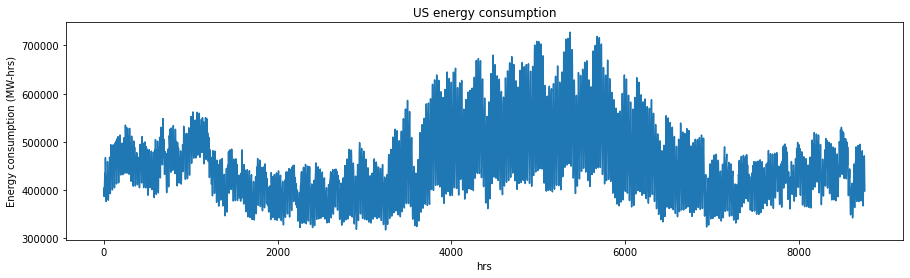

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import periodogram, welch

fn = np.loadtxt("https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/data/US_electricity_data_2021.csv")
tn = range(len(fn))

plt.figure(figsize=(15,4))
plt.plot(tn,fn)

plt.xlabel('hrs')
plt.ylabel('Energy consumption (MW-hrs)')
plt.title('US energy consumption')
plt.show()

Your tasks are as follows:

- Calculate the periodogram using `scipy.signal.periodogram()` and determine the frequency $\nu_k$ where the power is largest. Repeat the same step using `scipy.signal.welch()`. Plot the two periodograms on the same plot (choose a log scale for the $y$-axis and adjust your `plt.ylim()` in a reasonable way.

- Perform the same steps as in Exercise 30 to identify the weekly periodic signal:
    - Use `fft()` to calculate the Fourier coefficients
    - Apply a band-pass filter to select only Fourier coefficients with $0.9/{\rm week} < |\nu_k| < 1.1/{\rm week}$.
    - Use `ifft()` to construct new band-passed samples and plot them. (Add back in the mean value of the samples you subtracted out.)

- Repeat the steps for a low-pass filter $|\nu_k| < 1.1/{\rm week}$.





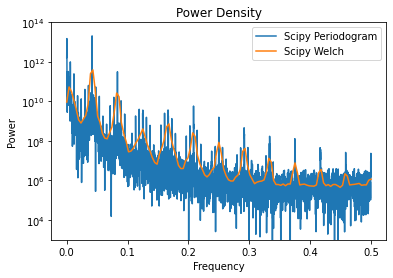

Max power using Welch method is at frequency = 0.04296875
Max power using periodogram is at frequency  = 0.041666666666666664


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


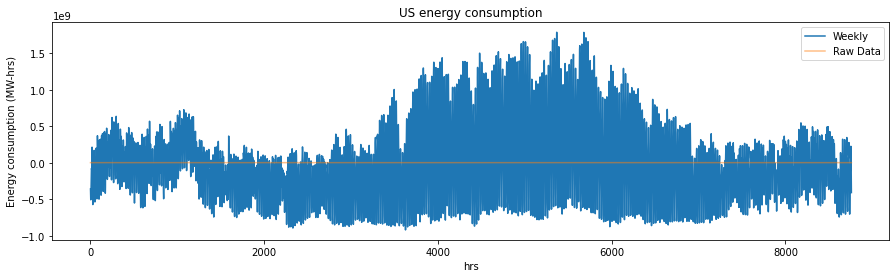

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


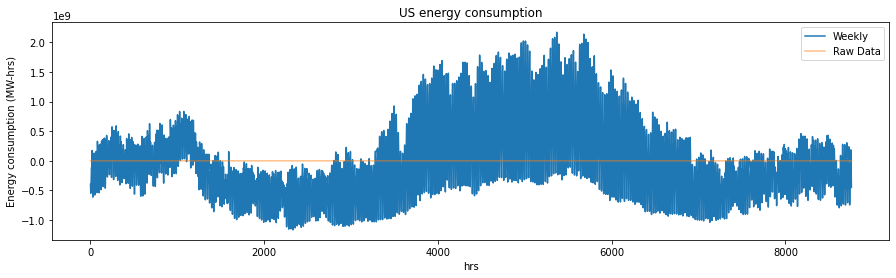

In [36]:
# Your code here
## Use scipy.signal.periodogram
frequency_periodo,power_spec_periodo = periodogram(fn,window='hann')
plt.plot(frequency_periodo,power_spec_periodo,label='Scipy Periodogram')
plt.yscale('log')
plt.title('Power Density')

##  Use scipy.signal.welch
frequency_welch, power_spec_welch = welch(fn)
plt.plot(frequency_welch,power_spec_welch,label='Scipy Welch')
plt.legend()
plt.ylim([10**3,10**14])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

index_periodo = np.argmax(power_spec_periodo)
index_welch = np.argmax(power_spec_welch)
print('Max power using Welch method is at frequency =',frequency_welch[index_welch])
print('Max power using periodogram is at frequency  =',frequency_periodo[index_periodo])
max_freq=frequency_welch[index_welch]

## Repeat exercise 30 steps
N=len(tn)
fn_adjusted = fn - np.mean(fn)
ck = fft(fn_adjusted)
for i in range(129):
  if frequency_welch[i] < 0.9 * max_freq:
    ck[i] = 0 
  elif frequency_welch[i] > 1.1 * max_freq:
    ck[i] = 0

new_fn = ifft(ck*N) + np.mean(fn)

plt.figure(figsize=(15,4))
plt.plot(tn,new_fn,label='Weekly')
plt.plot(tn,fn,alpha=0.5,label='Raw Data')
plt.legend()
plt.xlabel('hrs')
plt.ylabel('Energy consumption (MW-hrs)')
plt.title('US energy consumption')
plt.show()

## Low frequncy filter
ck = fft(fn_adjusted)
for i in range(129):
  if frequency_welch[i] > 1.1 * max_freq:
    ck[i] = 0

new_fn = ifft(ck*N) + np.mean(fn)

plt.figure(figsize=(15,4))
plt.plot(tn,new_fn,label='Weekly')
plt.plot(tn,fn,alpha=0.5,label='Raw Data')
plt.legend()
plt.xlabel('hrs')
plt.ylabel('Energy consumption (MW-hrs)')
plt.title('US energy consumption')
plt.show()

